In [1]:
# cuebiq countries: Britain, India, Indonesia, Italy, Mexico, Singapore, US

In [3]:
import pandas as pd
import geopandas as gpd
import os, sys
import numpy as np
sys.path.append("../")
import esy.osm.pbf
import requests
import glob
import geopandas as gpd
import numpy as np

In [2]:
# country = 'colombia'
# path = f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}_pois/{country}-latest-free.shp/'
# f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')


## Defining master functions

In [3]:
def master_function(country):
    filepath = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}/{country}-latest.osm.pbf')

    osm = esy.osm.pbf.File(filepath)
    '''
    Commercial
    Transportation
    Sport
    Public
    Warehouse
    Govt
    Financial
    Emergency
    Education
    Gas
    Hospital
    
    '''

    records = [entry for entry in osm if 

               entry.tags.get('shop') or 
               entry.tags.get('tourism') or                              
               entry.tags.get('office') or                              
               (entry.tags.get('amenity') in ['marketplace','restaurant','fast_food','cafe','bar','pub']) or

               entry.tags.get('aeroway') or 
               entry.tags.get('highway') or 
               entry.tags.get('railway') or 
               (entry.tags.get('building') in ['aerodrome','ferry_terminal','train_station']) or
               (entry.tags.get('amenity') in ['ferry_terminal','bus_station']) or
               
               entry.tags.get('sport') or 
               (entry.tags.get('leisure') in ['park','stadium, swimming pool, pitch, sport_centre']) or
              
               entry.tags.get('building')=='public' or 
               (entry.tags.get('historic')) or                      
               (entry.tags.get('amenity') in ['place_of_worship','community_centre','library','toilets']) or
               
               (entry.tags.get('building')=='warehouse') or 
               (entry.tags.get('industrial')=='warehouse') or
               
               (entry.tags.get('amenity') in ['court_house','townhall','embassy','post_office']) or                           
               (entry.tags.get('government')) or                             
               (entry.tags.get('building')=='civic') or 
               (entry.tags.get('landuse')=='military') or 
               (entry.tags.get('office') in ['government','political_party','notary']) or 
               (entry.tags.get('military')) or 
               
               (entry.tags.get('amenity') in ['atm','bank','bureau_de_change','microfinance','mobile_money_agent','money_transfer']) or

               entry.tags.get('emergency') or 
               (entry.tags.get('amenity') in ['police','fire_station']) or 
               
               (entry.tags.get('amenity') in ['kindergarten','school', 'college', 'university','language_school']) or
               (entry.tags.get('office')=='educational_institution') or
               
               (entry.tags.get('amenity') in ['fuel']) or
               
               (entry.tags.get('healthcare') or            
                entry.tags.get('amenity') in ['doctors', 'dentist', 'clinic', 'toilets', 'hospital', 'pharmacy'] or
                entry.tags.get('shop') in ('herbalist','nutrition_supplements'))

              ]    
    
    df = pd.DataFrame(records)
    return df

  

In [4]:
def labeling(df):
    category = []
    subcategory = []
    metadata = []
    names = []
    for i in df['tags']:
        meta = []
        cat = []
        sub = []

        if 'amenity' in i.keys():
            cat.append('amenity')
            sub.append(i['amenity'])
            meta.append(i['amenity'])               
        elif 'building' in i.keys():
            cat.append('building')
            sub.append('building')
            meta.append(i['building'])                                      
        
        
        #commercial pois
        elif 'shop' in i.keys():
            cat.append('retail_and_recreation')
            sub.append('shop')
            meta.append(i['shop'])
        elif 'tourism' in i.keys():
            cat.append('retail_and_recreation')
            sub.append('tourism')        
            meta.append(i['tourism'])
        elif 'office' in i.keys():
            cat.append('workplace')
            sub.append('office')
            meta.append(i['office'])

        #transportation pois
        elif 'aeroway' in i.keys():
            cat.append('transportation_and_transit')
            sub.append('aeroway')
            meta.append(i['aeroway'])
        elif 'highway' in i.keys():
            cat.append('transportation_and_transit')
            sub.append('highway')
            meta.append(i['highway'])            
        elif 'railway' in i.keys():
            cat.append('transportation_and_transit')
            sub.append('railway')
            meta.append(i['railway'])                       

        #sport
        elif 'sport' in i.keys():
            cat.append('retail_and_recreation')
            sub.append('sport')
            meta.append(i['sport']) 
            
        elif 'leisure' in i.keys():
            cat.append('retail_and_recreation')
            sub.append('leisure')
            meta.append(i['leisure'])             

        #public
        elif ('building' in i.keys()):
            if(i['building']=='public'):
                cat.append('public')
                sub.append('public_building')
                meta.append(i['building'])                   
        elif 'historic' in i.keys():
            cat.append('public')
            sub.append('historic')
            meta.append(i['historic'])                      

        #warehouse
        elif ('building' in i.keys()):
            if (i['building']=='warehouse'):
                cat.append('warehouse')
                sub.append('warehouse')
                meta.append(i['building'])   
        elif ('industrial' in i.keys()):
            if (i['industrial']=='warehouse'):
                cat.append('warehouse')
                sub.append('warehouse')
                meta.append(i['industrial'])               
        
        #emergency_and_healthcare
        elif 'emergency' in i.keys():
            cat.append('healthcare')
            sub.append('emergency')
            meta.append(i['emergency']) 
        elif 'healthcare' in i.keys():
            cat.append('healthcare')
            sub.append('healthcare')
            meta.append(i['healthcare']) 
            
        #govt
        elif 'government' in i.keys():
            cat.append('government')
            sub.append('government')
            meta.append(i['government']) 
        elif ('building' in i.keys()):
            if (i['building']=='civic'):
                cat.append('government')
                sub.append('civic')
                meta.append(i['building'])   
            else:
                pass
        elif 'military' in i.keys():
            cat.append('government')
            sub.append('military')
            meta.append(i['military']) 
        elif ('landuse' in i.keys()):
            if (i['landuse']=='military'):
                cat.append('government')
                sub.append('military')
                meta.append(i['landuse'])
            else:
                pass
        elif ('office' in i.keys()):
            if (i['office'] in ['government','political_party','notary']):
                cat.append('government')
                sub.append('office')
                meta.append(i['office']) 
            else:
                pass
                
        


            
        #education
        elif ('office' in i.keys()):
            if (i['office']=='educational_institution'):
                cat.append('education')
                sub.append('office')
                meta.append(i['office']) 
            else:
                pass
            
        else:
            if cat == []:
                cat.append(None)
            if sub == []:
                sub.append(None)
            if meta == []:
                meta.append(None)
        category.append(cat)
        subcategory.append(sub)
        metadata.append(meta)
        if 'name' in i.keys():
            names.append(i['name'])
        else:
            names.append(None)
    df['name'] = names
    df['category'] = category
    df['subcategory'] = subcategory
    df['metadata'] = metadata
    df['id'] = df['id'].astype(str)
    return df

In [5]:
def read_shapefile(country):
    filenames = []
    path = f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}/{country}-latest-free.shp/'
    for file in os.listdir(path):
        if file.endswith('.shp'):
            filenames.append(file)

    lengths = []
    shp=pd.DataFrame([])
    for i in filenames:
        temp = []
        temp = (gpd.read_file(path+i))
        print(i,len(temp))
        lengths.append(temp)
        shp = pd.concat([shp,temp],ignore_index=True)

    return shp

## Running master functions

### Vietnam

In [7]:
shp = read_shapefile('vietnam')

gis_osm_landuse_a_free_1.shp 22855
gis_osm_natural_free_1.shp 4532
gis_osm_buildings_a_free_1.shp 503779


<ipython-input-6-49de46f1610e>:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  shp = pd.concat([shp,temp],ignore_index=True)


gis_osm_waterways_free_1.shp 19229
gis_osm_pofw_free_1.shp 736
gis_osm_water_a_free_1.shp 19586
gis_osm_transport_free_1.shp 5508
gis_osm_places_a_free_1.shp 365
gis_osm_natural_a_free_1.shp 333
gis_osm_places_free_1.shp 6735
gis_osm_pofw_a_free_1.shp 1768
gis_osm_pois_free_1.shp 54443
gis_osm_traffic_a_free_1.shp 1352
gis_osm_traffic_free_1.shp 26130
gis_osm_railways_free_1.shp 2263
gis_osm_transport_a_free_1.shp 113
gis_osm_pois_a_free_1.shp 13595
gis_osm_roads_free_1.shp 846842


In [8]:
len(shp)

1530164

In [9]:
%%time
country = 'vietnam'
path = f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}_pois/{country}-latest-free.shp/'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')

df = master_function(f,country)
labeled = labeling(df).explode('metadata').explode('subcategory').explode('category')
labeled.head()

CPU times: user 2min 1s, sys: 5.87 s, total: 2min 7s
Wall time: 2min 32s


id                                               tags  \
0  81794043  {'crossing': 'traffic_signals', 'highway': 'tr...   
1  81795094  {'crossing': 'uncontrolled', 'highway': 'cross...   
2  81799489            {'railway': 'switch', 'source': 'Bing'}   
3  81799495                      {'railway': 'level_crossing'}   
4  81800150            {'railway': 'switch', 'source': 'Bing'}   

                                     lonlat  name                    category  \
0  (105.84748279999992, 21.030446899999998)  None  transportation_and_transit   
1  (105.85067549999994, 21.034078600000004)  None  transportation_and_transit   
2  (105.84088219999994, 21.020905500000005)  None  transportation_and_transit   
3  (105.84120839999994, 21.027667600000004)  None  transportation_and_transit   
4  (105.84085319999994, 21.021358700000004)  None  transportation_and_transit   

  subcategory         metadata  
0     highway  traffic_signals  
1     highway         crossing  
2     railway           switch  
3     railway   level_crossing  
4     railway           switch

In [10]:
%%time
merge = pd.merge(labeled,shp[['osm_id','geometry']],right_on='osm_id',left_on='id',how='left')

CPU times: user 2.33 s, sys: 748 ms, total: 3.08 s
Wall time: 4.03 s


In [11]:
len(merge.dropna(subset=['geometry']))/len(merge)#['geometry'].isnull().sum()/len(merge)

0.9892481580623281

In [12]:
data = merge.dropna(subset=['geometry'])[['id','name','category','subcategory','metadata','geometry','tags']]

In [13]:
data.head()

id  name                    category subcategory         metadata  \
0  81794043  None  transportation_and_transit     highway  traffic_signals   
1  81795094  None  transportation_and_transit     highway         crossing   
3  81799495  None  transportation_and_transit     railway   level_crossing   
7  82565026  None  transportation_and_transit     railway   level_crossing   
8  82566014  None  transportation_and_transit     railway   level_crossing   

                     geometry  \
0  POINT (105.84748 21.03045)   
1  POINT (105.85068 21.03408)   
3  POINT (105.84121 21.02767)   
7  POINT (105.84126 21.01075)   
8  POINT (105.84066 20.97219)   

                                                tags  
0  {'crossing': 'traffic_signals', 'highway': 'tr...  
1  {'crossing': 'uncontrolled', 'highway': 'cross...  
3                      {'railway': 'level_crossing'}  
7  {'crossing:barrier': 'full', 'crossing:light':...  
8                      {'railway': 'level_crossing'}

In [14]:
len(data.drop_duplicates(subset=['id']))

948697

In [15]:
len(data)

955312

In [16]:
data['geometry'].apply(lambda x: type(x)).unique()

array([<class 'shapely.geometry.point.Point'>,
       <class 'shapely.geometry.linestring.LineString'>,
       <class 'shapely.geometry.multipolygon.MultiPolygon'>,
       <class 'shapely.geometry.polygon.Polygon'>], dtype=object)

In [17]:
data.to_csv(f'{country}_pois.csv')

In [1]:
from shapely import wkt

In [25]:
vietnam = pd.read_csv('../data/osm/vietnam_pois/vietnam_pois.csv',index_col=0)

In [32]:
vietnam['geometry'] = vietnam['geometry'].apply(wkt.loads)

In [29]:
gadm2 = gpd.read_file('../../covid-analytics/data/boundaries/vietnam/gadm36_VNM_shp/gadm36_VNM_1.shp')

In [34]:
vietnam = gpd.GeoDataFrame(vietnam,geometry=vietnam.geometry,crs=gadm2.crs)

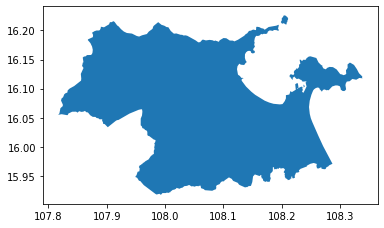

In [41]:
gadm2[gadm2['VARNAME_1']=='Da Nang'].plot()

In [43]:
danang = vietnam[vietnam.within(gadm2[gadm2['VARNAME_1']=='Da Nang'].geometry.squeeze())]

In [46]:
danang.to_csv('danang.csv')

### Mexico

In [240]:
shp = read_shapefile('mexico')

gis_osm_landuse_a_free_1.shp 143468
gis_osm_natural_free_1.shp 32581
gis_osm_buildings_a_free_1.shp 1098324


<ipython-input-152-49de46f1610e>:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  shp = pd.concat([shp,temp],ignore_index=True)


gis_osm_waterways_free_1.shp 67726
gis_osm_pofw_free_1.shp 3432
gis_osm_water_a_free_1.shp 38330
gis_osm_transport_free_1.shp 8703
gis_osm_places_a_free_1.shp 2220
gis_osm_natural_a_free_1.shp 769
gis_osm_places_free_1.shp 49550
gis_osm_pofw_a_free_1.shp 4123
gis_osm_pois_free_1.shp 113813
gis_osm_traffic_a_free_1.shp 17607
gis_osm_traffic_free_1.shp 56793
gis_osm_railways_free_1.shp 9283
gis_osm_transport_a_free_1.shp 786
gis_osm_pois_a_free_1.shp 111282
gis_osm_roads_free_1.shp 2871280


In [241]:
len(shp)

4630070

In [245]:
%%time
country = 'mexico'
path = f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}_pois/{country}-latest-free.shp/'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')

df = master_function(f,country)
labeled = labeling(df).explode('metadata').explode('subcategory').explode('category')
labeled.head()

CPU times: user 6min 19s, sys: 8min 21s, total: 14min 41s
Wall time: 33min 1s


id                                               tags  \
0  26514653                     {'highway': 'traffic_signals'}   
1  28774831  {'highway': 'traffic_signals', 'traffic_signal...   
2  28774889  {'highway': 'traffic_signals', 'traffic_signal...   
3  28776032  {'highway': 'traffic_signals', 'traffic_signal...   
4  28776223  {'highway': 'traffic_signals', 'traffic_signal...   

                               lonlat  name                    category  \
0   (-106.42879520000001, 23.2270703)  None  transportation_and_transit   
1   (-103.31705810000001, 20.7031222)  None  transportation_and_transit   
2  (-103.3151198, 20.706064899999998)  None  transportation_and_transit   
3          (-103.3137255, 20.7079174)  None  transportation_and_transit   
4          (-103.3136154, 20.7080216)  None  transportation_and_transit   

  subcategory         metadata  
0     highway  traffic_signals  
1     highway  traffic_signals  
2     highway  traffic_signals  
3     highway  traffic_signals  
4     highway  traffic_signals

In [246]:
%%time
merge = pd.merge(labeled,shp[['osm_id','geometry']],right_on='osm_id',left_on='id',how='left')

CPU times: user 26.4 s, sys: 2min 47s, total: 3min 13s
Wall time: 8min 24s


In [247]:
len(merge.dropna(subset=['geometry']))/len(merge)#['geometry'].isnull().sum()/len(merge)

0.9882403781494165

In [248]:
data = merge.dropna(subset=['geometry'])[['id','name','category','subcategory','metadata','geometry','tags']]

In [249]:
data.head()

id  name                    category subcategory         metadata  \
0  26514653  None  transportation_and_transit     highway  traffic_signals   
1  28774831  None  transportation_and_transit     highway  traffic_signals   
2  28774889  None  transportation_and_transit     highway  traffic_signals   
3  28776032  None  transportation_and_transit     highway  traffic_signals   
4  28776223  None  transportation_and_transit     highway  traffic_signals   

                      geometry  \
0  POINT (-106.42880 23.22707)   
1  POINT (-103.31706 20.70312)   
2  POINT (-103.31512 20.70606)   
3  POINT (-103.31373 20.70792)   
4  POINT (-103.31362 20.70802)   

                                                tags  
0                     {'highway': 'traffic_signals'}  
1  {'highway': 'traffic_signals', 'traffic_signal...  
2  {'highway': 'traffic_signals', 'traffic_signal...  
3  {'highway': 'traffic_signals', 'traffic_signal...  
4  {'highway': 'traffic_signals', 'traffic_signal...

In [250]:
len(data.drop_duplicates(subset=['id']))

3161271

In [251]:
len(data)

3219868

In [252]:
data['geometry'].apply(lambda x: type(x)).unique()

array([<class 'shapely.geometry.point.Point'>,
       <class 'shapely.geometry.linestring.LineString'>,
       <class 'shapely.geometry.polygon.Polygon'>,
       <class 'shapely.geometry.multipolygon.MultiPolygon'>], dtype=object)

In [253]:
data.to_csv(f'{country}_pois.csv')

In [218]:
# merge.iloc[:808151,:][merge.iloc[:808151,'geometry']==None]

### Colombia

In [153]:
shp = read_shapefile('colombia')

gis_osm_landuse_a_free_1.shp 99108
gis_osm_natural_free_1.shp 38557
gis_osm_buildings_a_free_1.shp 1535000


<ipython-input-152-49de46f1610e>:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  shp = pd.concat([shp,temp],ignore_index=True)


gis_osm_waterways_free_1.shp 32581
gis_osm_pofw_free_1.shp 1355
gis_osm_water_a_free_1.shp 24613
gis_osm_transport_free_1.shp 4855
gis_osm_places_a_free_1.shp 940
gis_osm_natural_a_free_1.shp 609
gis_osm_places_free_1.shp 48428
gis_osm_pofw_a_free_1.shp 2419
gis_osm_pois_free_1.shp 69916
gis_osm_traffic_a_free_1.shp 6720
gis_osm_traffic_free_1.shp 22312
gis_osm_railways_free_1.shp 805
gis_osm_transport_a_free_1.shp 693
gis_osm_pois_a_free_1.shp 51759
gis_osm_roads_free_1.shp 615721


In [155]:
len(shp)

2556391

In [160]:
%%time
country='colombia'
# df = master_function(f,country)
labeled = labeling(df).explode('metadata').explode('subcategory').explode('category')
labeled.head()

CPU times: user 18.6 s, sys: 26.1 s, total: 44.6 s
Wall time: 1min 13s


id                                               tags  \
0  109010581  {'amenity': 'ferry_terminal', 'name': 'Ferry P...   
1  128071490  {'amenity': 'ferry_terminal', 'cargo': 'passen...   
2  207467484  {'building': 'hut', 'name': 'Aboriginal hut', ...   
3  249418926  {'name': 'Rafael Rodríguez', 'source': 'GNS', ...   
4  249418933  {'name': 'Rita Lecumberry', 'source': 'GNS', '...   

                                      lonlat  category     subcategory  \
0   (-75.52193630000014, 10.285656899999953)   amenity  ferry_terminal   
1    (-76.76754979999993, 7.312697700000006)   amenity  ferry_terminal   
2  (-60.322546199999906, -3.044940599999986)  building        building   
3  (-76.84638900000003, 0.23555600000002241)   amenity          school   
4   (-76.88694400000003, 0.2313890000000224)   amenity          school   

         metadata                      name  
0  ferry_terminal  Ferry Pasacaballo - Barú  
1  ferry_terminal                      None  
2             hut            Aboriginal hut  
3          school          Rafael Rodríguez  
4          school           Rita Lecumberry

In [207]:
%%time
merge = pd.merge(labeled,shp[['osm_id','geometry']],right_on='osm_id',left_on='id',how='left')

CPU times: user 3.99 s, sys: 6.97 s, total: 11 s
Wall time: 18.8 s


In [214]:
len(merge.dropna(subset=['geometry']))/len(merge)#['geometry'].isnull().sum()/len(merge)

0.9686024022738325

In [236]:
data = merge.dropna(subset=['geometry'])[['id','name','category','subcategory','metadata','geometry','tags']]

In [237]:
data.head()

id                      name  category     subcategory  \
0  109010581  Ferry Pasacaballo - Barú   amenity  ferry_terminal   
1  128071490                      None   amenity  ferry_terminal   
2  207467484            Aboriginal hut  building        building   
3  249418926          Rafael Rodríguez   amenity          school   
4  249418933           Rita Lecumberry   amenity          school   

         metadata                    geometry  \
0  ferry_terminal  POINT (-75.52194 10.28566)   
1  ferry_terminal   POINT (-76.76755 7.31270)   
2             hut  POINT (-60.32255 -3.04494)   
3          school   POINT (-76.84639 0.23556)   
4          school   POINT (-76.88694 0.23139)   

                                                tags  
0  {'amenity': 'ferry_terminal', 'name': 'Ferry P...  
1  {'amenity': 'ferry_terminal', 'cargo': 'passen...  
2  {'building': 'hut', 'name': 'Aboriginal hut', ...  
3  {'name': 'Rafael Rodríguez', 'source': 'GNS', ...  
4  {'name': 'Rita Lecumberry', 'source': 'GNS', '...

In [238]:
data.to_csv('colombia_pois.csv')

In [233]:
len(data.drop_duplicates(subset=['id']))

756220

In [234]:
len(data)

782777

In [218]:
# merge.iloc[:808151,:][merge.iloc[:808151,'geometry']==None]

### Indonesia

In [12]:
%%time
country='indonesia'
df = master_function(country)
labeled = labeling(df).explode('metadata').explode('subcategory').explode('category')
labeled.head()

CPU times: user 21min 40s, sys: 27.4 s, total: 22min 7s
Wall time: 22min 22s


id                                               tags  \
0  25432860                     {'highway': 'traffic_signals'}   
1  25432923                     {'highway': 'traffic_signals'}   
2  25433284  {'bus': 'yes', 'ref': 'Jl. Lombok', 'name': 'J...   
3  25433670  {'bus': 'yes', 'highway': 'bus_stop', 'name': ...   
4  25433891  {'bus': 'yes', 'ref': 'Pintu Masuk Bandara Hus...   

                                     lonlat  \
0  (107.62995730000002, -6.915744800000001)   
1          (107.63145850000002, -6.9186104)   
2          (107.61968860000002, -6.9072516)   
3  (107.60292690000004, -6.904267000000001)   
4  (107.58584210000002, -6.906030400000002)   

                                      name                    category  \
0                                     None  transportation_and_transit   
1                                     None  transportation_and_transit   
2                               Jl. Lombok  transportation_and_transit   
3                              Abdul Rivai  transportation_and_transit   
4  Pintu Masuk Bandara Husein Sastranegara  transportation_and_transit   

  subcategory         metadata  
0     highway  traffic_signals  
1     highway  traffic_signals  
2     highway         bus_stop  
3     highway         bus_stop  
4     highway         bus_stop

In [13]:
print(len(labeled))


4617834


In [14]:
%%time
shp = read_shapefile('indonesia')

gis_osm_landuse_a_free_1.shp 145363
gis_osm_natural_free_1.shp 39801
gis_osm_waterways_free_1.shp 104007


<ipython-input-11-3318e46cbb49>:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  shp = pd.concat([shp,temp],ignore_index=True)


gis_osm_buildings_a_free_2.shp 12516007
gis_osm_buildings_a_free_3.shp 3885722
gis_osm_pofw_free_1.shp 11811
gis_osm_water_a_free_1.shp 24429
gis_osm_transport_free_1.shp 3911
gis_osm_places_a_free_1.shp 2747
gis_osm_natural_a_free_1.shp 2006
gis_osm_places_free_1.shp 87331
gis_osm_pofw_a_free_1.shp 44041
gis_osm_pois_free_1.shp 73519
gis_osm_traffic_a_free_1.shp 5147
gis_osm_traffic_free_1.shp 22589
gis_osm_railways_free_1.shp 4713
gis_osm_transport_a_free_1.shp 647
gis_osm_pois_a_free_1.shp 88889
gis_osm_roads_free_1.shp 4338646
CPU times: user 23min 50s, sys: 1h 21min 1s, total: 1h 44min 52s
Wall time: 2h 34min 12s


In [15]:
%%time
merge = pd.merge(labeled,shp[['osm_id','geometry']],right_on='osm_id',left_on='id',how='left')

CPU times: user 1min 47s, sys: 12min 31s, total: 14min 19s
Wall time: 25min 39s


In [16]:
len(merge.dropna(subset=['geometry']))/len(merge)#['geometry'].isnull().sum()/len(merge)

0.9902444338096803

In [17]:
data = merge.dropna(subset=['geometry'])[['id','name','category','subcategory','metadata','geometry','tags']]

In [18]:
data.head()

id                                     name  \
0  25432860                                     None   
1  25432923                                     None   
2  25433284                               Jl. Lombok   
3  25433670                              Abdul Rivai   
4  25433891  Pintu Masuk Bandara Husein Sastranegara   

                     category subcategory         metadata  \
0  transportation_and_transit     highway  traffic_signals   
1  transportation_and_transit     highway  traffic_signals   
2  transportation_and_transit     highway         bus_stop   
3  transportation_and_transit     highway         bus_stop   
4  transportation_and_transit     highway         bus_stop   

                     geometry  \
0  POINT (107.62996 -6.91574)   
1  POINT (107.63146 -6.91861)   
2  POINT (107.61969 -6.90725)   
3  POINT (107.60293 -6.90427)   
4  POINT (107.58584 -6.90603)   

                                                tags  
0                     {'highway': 'traffic_signals'}  
1                     {'highway': 'traffic_signals'}  
2  {'bus': 'yes', 'ref': 'Jl. Lombok', 'name': 'J...  
3  {'bus': 'yes', 'highway': 'bus_stop', 'name': ...  
4  {'bus': 'yes', 'ref': 'Pintu Masuk Bandara Hus...

In [22]:
data.drop_duplicates(subset=['id']).to_csv('indonesia_pois.csv')

In [19]:
len(data.drop_duplicates(subset=['id']))

4572480

In [20]:
len(data)

4599827

In [21]:
(data.drop_duplicates(subset=['id'])).head()

id                                     name  \
0  25432860                                     None   
1  25432923                                     None   
2  25433284                               Jl. Lombok   
3  25433670                              Abdul Rivai   
4  25433891  Pintu Masuk Bandara Husein Sastranegara   

                     category subcategory         metadata  \
0  transportation_and_transit     highway  traffic_signals   
1  transportation_and_transit     highway  traffic_signals   
2  transportation_and_transit     highway         bus_stop   
3  transportation_and_transit     highway         bus_stop   
4  transportation_and_transit     highway         bus_stop   

                     geometry  \
0  POINT (107.62996 -6.91574)   
1  POINT (107.63146 -6.91861)   
2  POINT (107.61969 -6.90725)   
3  POINT (107.60293 -6.90427)   
4  POINT (107.58584 -6.90603)   

                                                tags  
0                     {'highway': 'traffic_signals'}  
1                     {'highway': 'traffic_signals'}  
2  {'bus': 'yes', 'ref': 'Jl. Lombok', 'name': 'J...  
3  {'bus': 'yes', 'highway': 'bus_stop', 'name': ...  
4  {'bus': 'yes', 'ref': 'Pintu Masuk Bandara Hus...

### India

In [6]:
%%time
country='india'
df = master_function(country)
labeled = labeling(df).explode('metadata').explode('subcategory').explode('category')
labeled.head()

CPU times: user 16min 27s, sys: 40.8 s, total: 17min 8s
Wall time: 19min 17s


id                                               tags  \
0  15382325     {'name': 'Muncipal Hq', 'highway': 'bus_stop'}   
1  15382358    {'highway': 'bus_stop', 'name': 'ITI Junction'}   
2  15510304     {'highway': 'bus_stop', 'name': 'Ambala nada'}   
3  15849963             {'highway': 'bus_stop', 'name': 'FCI'}   
4  16173235  {'alt_name:es': 'Mumbai', 'capital': '4', 'cap...   

                                    lonlat          name  \
0          (76.33318700000004, 10.3065115)   Muncipal Hq   
1          (76.33145280000005, 10.3057609)  ITI Junction   
2  (76.31892210000001, 10.301338499999998)   Ambala nada   
3   (76.3190611999999, 10.299324899999993)           FCI   
4  (72.87739279999988, 19.075989899999982)        Mumbai   

                     category subcategory    metadata  
0  transportation_and_transit     highway    bus_stop  
1  transportation_and_transit     highway    bus_stop  
2  transportation_and_transit     highway    bus_stop  
3  transportation_and_transit     highway    bus_stop  
4       retail_and_recreation     tourism  attraction

In [7]:
print(len(labeled))


4131339


In [8]:
%%time
shp = read_shapefile('india')

gis_osm_landuse_a_free_1.shp 342384
gis_osm_natural_free_1.shp 34783
gis_osm_buildings_a_free_1.shp 11006729


<ipython-input-5-3318e46cbb49>:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  shp = pd.concat([shp,temp],ignore_index=True)


gis_osm_waterways_free_1.shp 135065
gis_osm_pofw_free_1.shp 17532
gis_osm_water_a_free_1.shp 218872
gis_osm_transport_free_1.shp 30820
gis_osm_places_a_free_1.shp 5147
gis_osm_natural_a_free_1.shp 3557
gis_osm_places_free_1.shp 146228
gis_osm_pofw_a_free_1.shp 16159
gis_osm_pois_free_1.shp 197187
gis_osm_traffic_a_free_1.shp 6910
gis_osm_traffic_free_1.shp 56377
gis_osm_railways_free_1.shp 63944
gis_osm_transport_a_free_1.shp 2198
gis_osm_pois_a_free_1.shp 83079
gis_osm_roads_free_1.shp 3575608
CPU times: user 18min 33s, sys: 1h 3min 22s, total: 1h 21min 56s
Wall time: 2h 28min 28s


In [9]:
%%time
merge = pd.merge(labeled,shp[['osm_id','geometry']],right_on='osm_id',left_on='id',how='left')

CPU times: user 1min 15s, sys: 6min 35s, total: 7min 50s
Wall time: 12min 48s


In [10]:
len(merge.dropna(subset=['geometry']))/len(merge)#['geometry'].isnull().sum()/len(merge)

0.9706037076482249

In [11]:
data = merge.dropna(subset=['geometry'])[['id','name','category','subcategory','metadata','geometry','tags']]

In [12]:
data.head()

id          name                    category subcategory    metadata  \
0  15382325   Muncipal Hq  transportation_and_transit     highway    bus_stop   
1  15382358  ITI Junction  transportation_and_transit     highway    bus_stop   
2  15510304   Ambala nada  transportation_and_transit     highway    bus_stop   
3  15849963           FCI  transportation_and_transit     highway    bus_stop   
4  16173235        Mumbai       retail_and_recreation     tourism  attraction   

                    geometry  \
0  POINT (76.33319 10.30651)   
1  POINT (76.33145 10.30576)   
2  POINT (76.31892 10.30134)   
3  POINT (76.31906 10.29932)   
4  POINT (72.87739 19.07599)   

                                                tags  
0     {'name': 'Muncipal Hq', 'highway': 'bus_stop'}  
1    {'highway': 'bus_stop', 'name': 'ITI Junction'}  
2     {'highway': 'bus_stop', 'name': 'Ambala nada'}  
3             {'highway': 'bus_stop', 'name': 'FCI'}  
4  {'alt_name:es': 'Mumbai', 'capital': '4', 'cap...

In [13]:
len(data.drop_duplicates(subset=['id']))

4008248

In [14]:
len(data)

4062786

In [16]:
data.drop_duplicates(subset=['id']).to_csv('../data/osm/india/india_pois.csv')

In [17]:
(data.drop_duplicates(subset=['id'])).head()

id          name                    category subcategory    metadata  \
0  15382325   Muncipal Hq  transportation_and_transit     highway    bus_stop   
1  15382358  ITI Junction  transportation_and_transit     highway    bus_stop   
2  15510304   Ambala nada  transportation_and_transit     highway    bus_stop   
3  15849963           FCI  transportation_and_transit     highway    bus_stop   
4  16173235        Mumbai       retail_and_recreation     tourism  attraction   

                    geometry  \
0  POINT (76.33319 10.30651)   
1  POINT (76.33145 10.30576)   
2  POINT (76.31892 10.30134)   
3  POINT (76.31906 10.29932)   
4  POINT (72.87739 19.07599)   

                                                tags  
0     {'name': 'Muncipal Hq', 'highway': 'bus_stop'}  
1    {'highway': 'bus_stop', 'name': 'ITI Junction'}  
2     {'highway': 'bus_stop', 'name': 'Ambala nada'}  
3             {'highway': 'bus_stop', 'name': 'FCI'}  
4  {'alt_name:es': 'Mumbai', 'capital': '4', 'cap...

## Checking how many lat lon we have

### Colombia

In [4]:
filenames = []
path = f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}_pois/{country}-latest-free.shp/'
for file in os.listdir(path):
    if file.endswith('.shp'):
        filenames.append(file)

In [35]:
# Function that checks overlap between ways and shapefiles
country = 'mexico'
filenames = []
path = f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}_pois/{country}-latest-free.shp/'
for file in os.listdir(path):
    if file.endswith('.shp'):
        filenames.append(file)

lengths = []
ids_=pd.DataFrame([])
for i in filenames:
    temp = []
    temp = (gpd.read_file(path+i))
    print(i,len(temp))
    lengths.append(temp)
    ids_ = pd.concat([ids_,temp['osm_id']])

f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
osm = esy.osm.pbf.File(f)

lat_lon_count = []
multi_polygon_count = []
n = 0
ids = []
multi = []
for i in osm:
    n=n+1
    ids.append(i.id)
    try:
        lat_lon_count.append(i.lonlat)
    except:
        multi.append(i.id)
        multi_polygon_count.append(i)

print(f'No of lat lon: {len(lat_lon_count)}')
print(f'No of multi polygon: {len(multi_polygon_count)}')
print(f'Total: {n}')
print(f'Ratio: {(len(lat_lon_count)/n)}')
        
total = len(set(ids_[0].astype(int)).intersection(set(ids)))
multi_total = len(set(ids_[0].astype(int)).intersection(set(multi)))
print(f'Total intersection: {total}')
print(f'Multi intersection: {mutli_total}')


gis_osm_landuse_a_free_1.shp 143468
gis_osm_natural_free_1.shp 32581
gis_osm_buildings_a_free_1.shp 1098324
gis_osm_waterways_free_1.shp 67726
gis_osm_pofw_free_1.shp 3432
gis_osm_water_a_free_1.shp 38330
gis_osm_transport_free_1.shp 8703
gis_osm_places_a_free_1.shp 2220
gis_osm_natural_a_free_1.shp 769
gis_osm_places_free_1.shp 49550
gis_osm_pofw_a_free_1.shp 4123
gis_osm_pois_free_1.shp 113813
gis_osm_traffic_a_free_1.shp 17607
gis_osm_traffic_free_1.shp 56793
gis_osm_railways_free_1.shp 9283
gis_osm_transport_a_free_1.shp 786
gis_osm_pois_a_free_1.shp 111282
gis_osm_roads_free_1.shp 2871280
No of lat lon: 39988706
No of multi polygon: 4426302
Total: 44415008
Ratio: 0.9003421996456693
Total intersection: 4561971


NameError: name 'mutli_total' is not defined

In [37]:
print(f'Multi intersection: {multi_total}')


Multi intersection: 4297705


In [42]:
temp['geometry'].type.unique()

array(['LineString'], dtype=object)

In [18]:
%%time
lengths = []
ids_=pd.DataFrame([])
for i in filenames:
    temp = []
    temp = (gpd.read_file(path+i))
    print(i,len(temp))
    lengths.append(temp)
    ids_ = pd.concat([ids_,temp['osm_id']])

    

gis_osm_landuse_a_free_1.shp 99108
gis_osm_natural_free_1.shp 38557
gis_osm_buildings_a_free_1.shp 1535000
gis_osm_waterways_free_1.shp 32581
gis_osm_pofw_free_1.shp 1355
gis_osm_water_a_free_1.shp 24613
gis_osm_transport_free_1.shp 4855
gis_osm_places_a_free_1.shp 940
gis_osm_natural_a_free_1.shp 609
gis_osm_places_free_1.shp 48428
gis_osm_pofw_a_free_1.shp 2419
gis_osm_pois_free_1.shp 69916
gis_osm_traffic_a_free_1.shp 6720
gis_osm_traffic_free_1.shp 22312
gis_osm_railways_free_1.shp 805
gis_osm_transport_a_free_1.shp 693
gis_osm_pois_a_free_1.shp 51759
gis_osm_roads_free_1.shp 615721
CPU times: user 2min, sys: 2min 45s, total: 4min 46s
Wall time: 8min 35s


In [29]:
len(ids_[0])

2556391

In [28]:
len(set(ids_[0].astype(int)).intersection(set(ids)))

2525536

In [31]:
len(set(ids_[0].astype(int)).intersection(set(multi)))

2340678

In [27]:
ids_[0].astype(int).iloc[0]

9354987

In [24]:
ids[0]

4116109

In [10]:
print(np.sum(lengths))

2556391


In [16]:
natural = gpd.read_file(path+filenames[1])
natural.head()

osm_id  code   fclass                      name  \
0  249416268  4111     peak  Cerro de la Virgen Negra   
1  271128377  4113  volcano             Volcán Chiles   
2  277831865  4111     peak        Entrada Capellania   
3  279947427  4111     peak                   la cima   
4  281862900  4111     peak                   La Popa   

                     geometry  
0   POINT (-77.61667 0.68333)  
1   POINT (-77.93725 0.81695)  
2   POINT (-73.76581 5.40395)  
3   POINT (-74.28554 4.66747)  
4  POINT (-75.52614 10.41989)

In [30]:
%%time

f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
osm = esy.osm.pbf.File(f)

lat_lon_count = []
multi_polygon_count = []
n = 0
ids = []
multi = []
for i in osm:
    n=n+1
    ids.append(i.id)
    try:
        lat_lon_count.append(i.lonlat)
    except:
        multi.append(i.id)
        multi_polygon_count.append(i)


CPU times: user 1min 26s, sys: 1min 42s, total: 3min 9s
Wall time: 5min 37s


In [15]:
print(f'No of lat lon: {len(lat_lon_count)}')
print(f'No of multi polygon: {len(multi_polygon_count)}')
print(f'Total: {n}')
print(f'Ratio: {(len(lat_lon_count)/n)}')

No of lat lon: 22975525
No of multi polygon: 2445595
Total: 25421120
Ratio: 0.903796724927934


### Mexico

In [ ]:
%%time
country = 'mexico'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
osm = esy.osm.pbf.File(f)

lat_lon_count = []
multi_polygon_count = []
n = 0
for i in osm:
    n=n+1
    try:
        lat_lon_count.append(i.lonlat)
    except:
        multi_polygon_count.append(i)

In [ ]:
print(f'No of lat lon: {len(lat_lon_count)}')
print(f'No of multi polygon: {len(multi_polygon_count)}')
print(f'Total: {n}')
print(f'Ratio: {(len(lat_lon_count)/n)}')

### India

In [ ]:
%%time
country = 'india'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
osm = esy.osm.pbf.File(f)

lat_lon_count = []
multi_polygon_count = []
n = 0
for i in osm:
    n=n+1
#     if n<100:
    try:
        lat_lon_count.append(i.lonlat)
    except:
        multi_polygon_count.append(i)
print(f'No of lat lon{len(lat_lon_count)}')
print(f'No of multi polygon{len(multi_polygon_count)}')
print(f'Total: {n}')
print(f'Ratio: {(len(temp)/n)}')

### Indonesia

In [ ]:
%%time
country = 'indonesia'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
osm = esy.osm.pbf.File(f)

lat_lon_count = []
multi_polygon_count = []
n = 0
for i in osm:
    n=n+1
#     if n<100:
    try:
        lat_lon_count.append(i.lonlat)
    except:
        multi_polygon_count.append(i)
print(f'No of lat lon{len(lat_lon_count)}')
print(f'No of multi polygon{len(multi_polygon_count)}')
print(f'Total: {n}')
print(f'Ratio: {(len(temp)/n)}')

## Defining functions (can be much more efficient)

In [37]:
%%time
df = master_function(f,'colombia')

CPU times: user 2min 34s, sys: 6.43 s, total: 2min 41s
Wall time: 2min 59s


In [4]:
def osm_google_extraction(subregion):
    return pd.concat([
    osm_financial_extraction(subregion),
    osm_gas_extraction(subregion),                               
    osm_education_extraction(subregion),                               
    osm_warehouse_extraction(subregion),     
    osm_commercial_extraction(subregion),
    osm_transportation_extraction(subregion),
    osm_sport_extraction(subregion),
    osm_public_extraction(subregion),
    osm_govt_extraction(subregion),
    osm_emergency_extraction(subregion),
    osm_hospital_extraction(subregion)])

In [5]:
def osm_commercial_extraction(filepath):
    '''
    Where: shop IS NOT NULL OR tourism IS NOT NULL OR amenity IN 
    ('marketplace','restaurant','fast_food','cafe','bar','pub') 
    OR office IS NOT NULL

    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('shop') or 
                             entry.tags.get('tourism') or                              
                             entry.tags.get('office') or                              
                            (entry.tags.get('amenity') in ['marketplace','restaurant','fast_food','cafe','bar','pub'])
                            )])
    print(f'No. of commercial records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    records['shop'] = records['tags'].apply(lambda x: x['shop'] if 'shop' in x.keys() else None)
    records['tourism'] = records['tags'].apply(lambda x: x['tourism'] if 'tourism' in x.keys() else None)
    records['office'] = records['tags'].apply(lambda x: x['office'] if 'office' in x.keys() else None)                             
    return records  

In [6]:
def osm_transportation_extraction(filepath):
    '''
    aeroway IS NOT NULL OR 
    highway IS NOT NULL OR 
    railway IS NOT NULL OR 
    building IN ('aerodrome','ferry_terminal','train_station') OR amenity IN ('ferry_terminal','bus_station')
    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if 
                            (entry.tags.get('aeroway') or 
                             entry.tags.get('highway') or 
                             entry.tags.get('railway') or 
                             (entry.tags.get('building') in ['aerodrome','ferry_terminal','train_station']) or
                             (entry.tags.get('amenity') in ['ferry_terminal','bus_station'])                             
                            )])
    print(f'No. of transportation records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    records['aeroway'] = records['tags'].apply(lambda x: x['aeroway'] if 'aeroway' in x.keys() else None)
    records['highway'] = records['tags'].apply(lambda x: x['highway'] if 'highway' in x.keys() else None)
    records['railway'] = records['tags'].apply(lambda x: x['railway'] if 'railway' in x.keys() else None)
    records['building'] = records['tags'].apply(lambda x: x['building'] if 'building' in x.keys() else None)
    
    
    return records  

In [7]:
def osm_sport_extraction(filepath):
    '''
    # sport 
    sport IS NOT NULL OR leisure IN ('park','stadium, swimming pool, pitch, sport_centre')
    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('sport') or \
                            (entry.tags.get('leisure') in ['park','stadium, swimming pool, pitch, sport_centre'])
                            )])
    print(f'No. of sport records = {len(records)}')
    records['sport'] = records['tags'].apply(lambda x: x['sport'] if 'sport' in x.keys() else None)
    records['leisure'] = records['tags'].apply(lambda x: x['leisure'] if 'leisure' in x.keys() else None)
    
    return records  

In [8]:
def osm_public_extraction(filepath):
    '''
    # public
    building='public' OR amenity IN ('place_of_worship','community_centre','library','toilets') OR historic IS NOT NULL

    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if 
                            (entry.tags.get('building')=='public' or 
                            (entry.tags.get('historic')) or                      
                            (entry.tags.get('amenity') in ['place_of_worship','community_centre','library','toilets'])
                            )])
    print(f'No. of public records = {len(records)}')
    records['building'] = records['tags'].apply(lambda x: x['public'] if 'public' in x.keys() else None)
    records['historic'] = records['tags'].apply(lambda x: x['historic'] if 'historic' in x.keys() else None)    
    records['anemity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    
    return records  

In [9]:
def osm_warehouse_extraction(filepath):
    '''
    Where: building='warehouse' OR industrial='warehouse'
    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('building')=='warehouse') or 
                            (entry.tags.get('industrial')=='warehouse')
                            ])
    print(f'No. of warehouse records = {len(records)}')
    records['building'] = records['tags'].apply(lambda x: x['building'] if 'building' in x.keys() else None)
    records['industrial'] = records['tags'].apply(lambda x: x['industrial'] if 'industrial' in x.keys() else None)
    
    return records  

In [10]:
def osm_govt_extraction(filepath):
    '''
    building='civic' OR office IN ('government','political_party','notary') OR 
    government IS NOT NULL OR landuse='military' 
    OR military IS NOT NULL 
    OR amenity IN ('court_house','townhall','embassy','post_office')    
    '''
    
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if 
                            ((entry.tags.get('amenity') in ['court_house','townhall','embassy','post_office']) or                           
                            (entry.tags.get('government')) or                             
                            (entry.tags.get('building')=='civic') or 
                            (entry.tags.get('landuse')=='military') or 
                            (entry.tags.get('office') in ['government','political_party','notary']) or 
                            (entry.tags.get('military'))
                            )])
    print(f'No. of govt. records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    records['government'] = records['tags'].apply(lambda x: x['government'] if 'government' in x.keys() else None)
    records['building'] = records['tags'].apply(lambda x: x['building'] if 'building' in x.keys() else None)
    records['landuse'] = records['tags'].apply(lambda x: x['landuse'] if 'landuse' in x.keys() else None)    
    records['office'] = records['tags'].apply(lambda x: x['office'] if 'office' in x.keys() else None)    
    records['military'] = records['tags'].apply(lambda x: x['military'] if 'military' in x.keys() else None)    
    return records  

In [11]:
def osm_financial_extraction(filepath):
    '''
    #financial
    amenity IN ('atm','bank','bureau_de_change','microfinance','mobile_money_agent','money_transfer')

    '''    
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('amenity') in ['atm','bank','bureau_de_change','microfinance','mobile_money_agent','money_transfer'])
                            ])
    print(f'No. of financial records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    
    return records  

In [12]:
def osm_emergency_extraction(filepath):
    '''
    #emergency
    Where: emergency IS NOT NULL OR amenity IN ('police','fire_station')
    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('emergency') or \
                            (entry.tags.get('amenity') in ['police','fire_station'])
                            )])
    print(f'No. of emergency records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    records['emergency'] = records['tags'].apply(lambda x: x['emergency'] if 'emergency' in x.keys() else None)
    
    return records  

In [13]:
def osm_education_extraction(filepath):
    '''
    #education
    amenity IN ('kindergarten', 'school', 'college', 'university','language_school') OR office='educational_institution'

    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('amenity') in ['kindergarten','school', 'college', 'university','language_school']) or\
                            (entry.tags.get('office')=='educational_institution')
                           ])
    print(f'No. of education records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    records['office_type'] = records['tags'].apply(lambda x: x['office'] if 'office' in x.keys() else None)
    
    return records   

In [14]:
def osm_gas_extraction(filepath):
    '''
    #gas station
    amenity='fuel'
    '''
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([entry for entry in osm if \
                            (entry.tags.get('amenity') in ['fuel'])] \
                          )
    print(f'No. of gas records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    return records   

In [39]:
def osm_hospital_extraction(filepath):
    osm = esy.osm.pbf.File(filepath)
    records = pd.DataFrame([[entry,entry.lonlat] for entry in osm if 
                            (entry.tags.get('healthcare') \
                             or entry.tags.get('amenity') in ['doctors', 'dentist', 'clinic', 'toilets', 'hospital', 'pharmacy'] \
                             or entry.tags.get('shop') in ('herbalist','nutrition_supplements'))])
    print(f'No. of hospital records = {len(records)}')
    records['amenity_name'] = records['tags'].apply(lambda x: x['amenity'] if 'amenity' in x.keys() else None)
    records['shop'] = records['tags'].apply(lambda x: x['shop'] if 'shop' in x.keys() else None)
    records['healthcare'] = records['tags'].apply(lambda x: x['healthcare'] if 'healthcare' in x.keys() else None)
    
    return records  

## Indonesia

In [20]:
%%time
country = 'indonesia'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
print(f)


/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/indonesia-latest.osm.pbf
No. of hospital records = 12868
CPU times: user 8min 59s, sys: 3.7 s, total: 9min 3s
Wall time: 9min 12s


In [22]:
hospital = osm_hospital_extraction(f)
gas = osm_gas_extraction_extraction(f)
education = osm_education_extraction(f)
emergency = osm_emergency_extraction(f)
financial = osm_financial_extraction(f)
govt = osm_govt_extraction(f)
warehouse = osm_warehouse_extraction(f)
public = osm_public_extraction(f)
sport = osm_sport_extraction(f)
transportation = osm_transportation_extraction(f)


No. of gas records = 3196
No. of education records = 207


In [28]:
country = 'indonesia'
hospital.to_csv(f'{country}_hospitals.csv')
gas.to_csv(f'{country}_gas.csv')
education.to_csv(f'{country}_education.csv')
emergency.to_csv(f'{country}_emergency.csv')
financial.to_csv(f'{country}_financial.csv')
govt.to_csv(f'{country}_govt.csv')
warehouse.to_csv(f'{country}_warehouse.csv')
public.to_csv(f'{country}_public.csv')
sport.to_csv(f'{country}_sport.csv')
transportation.to_csv(f'{country}_transportation.csv')

## Mexico

In [42]:
# %%time
# country = 'mexico'
# f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
# hospital = osm_hospital_extraction(f)
# hospital.to_csv(f'{country}_hospitals.csv')
# gas = osm_gas_extraction(f)
# gas.to_csv(f'{country}_gas.csv')
# education = osm_education_extraction(f)
# education.to_csv(f'{country}_education.csv')
# emergency = osm_emergency_extraction(f)
# emergency.to_csv(f'{country}_emergency.csv')
# financial = osm_financial_extraction(f)
# financial.to_csv(f'{country}_financial.csv')
# govt = osm_govt_extraction(f)
# govt.to_csv(f'{country}_govt.csv')
# warehouse = osm_warehouse_extraction(f)
# warehouse.to_csv(f'{country}_warehouse.csv')
# public = osm_public_extraction(f)
# public.to_csv(f'{country}_public.csv')
# sport = osm_sport_extraction(f)
# sport.to_csv(f'{country}_sport.csv')
# transportation = osm_transportation_extraction(f)
# transportation.to_csv(f'{country}_transportation.csv')

No. of hospital records = 9680
No. of gas records = 7738
No. of education records = 214
No. of emergency records = 2234
No. of financial records = 4594
No. of govt. records = 4402
No. of warehouse records = 6316
No. of public records = 18109
No. of sport records = 59921
No. of transportation records = 2936491
CPU times: user 19min 57s, sys: 45.5 s, total: 20min 43s
Wall time: 23min 22s


## Colombia

In [47]:
%%time
country = 'colombia'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
hospital = osm_hospital_extraction(f)
hospital.to_csv(f'{country}_hospitals.csv')
gas = osm_gas_extraction(f)
gas.to_csv(f'{country}_gas.csv')
education = osm_education_extraction(f)
education.to_csv(f'{country}_education.csv')
emergency = osm_emergency_extraction(f)
emergency.to_csv(f'{country}_emergency.csv')
financial = osm_financial_extraction(f)
financial.to_csv(f'{country}_financial.csv')
govt = osm_govt_extraction(f)
govt.to_csv(f'{country}_govt.csv')
warehouse = osm_warehouse_extraction(f)
warehouse.to_csv(f'{country}_warehouse.csv')
public = osm_public_extraction(f)
public.to_csv(f'{country}_public.csv')
sport = osm_sport_extraction(f)
sport.to_csv(f'{country}_sport.csv')
transportation = osm_transportation_extraction(f)
transportation.to_csv(f'{country}_transportation.csv')

No. of hospital records = 7755
No. of gas records = 3285
No. of education records = 422
No. of emergency records = 2984
No. of financial records = 3947
No. of govt. records = 2508
No. of warehouse records = 660
No. of public records = 7991
No. of sport records = 21414
No. of transportation records = 614517
CPU times: user 10min 28s, sys: 14.4 s, total: 10min 42s
Wall time: 11min 33s


## India

In [48]:
%%time
country = 'india'
f = os.path.join(f'/Users/mahamfaisalkhan/repos/world-bank/covid_local/data/osm/{country}-latest.osm.pbf')
hospital = osm_hospital_extraction(f)
hospital.to_csv(f'{country}_hospitals.csv')
gas = osm_gas_extraction(f)
gas.to_csv(f'{country}_gas.csv')
education = osm_education_extraction(f)
education.to_csv(f'{country}_education.csv')
emergency = osm_emergency_extraction(f)
emergency.to_csv(f'{country}_emergency.csv')
financial = osm_financial_extraction(f)
financial.to_csv(f'{country}_financial.csv')
govt = osm_govt_extraction(f)
govt.to_csv(f'{country}_govt.csv')
warehouse = osm_warehouse_extraction(f)
warehouse.to_csv(f'{country}_warehouse.csv')
public = osm_public_extraction(f)
public.to_csv(f'{country}_public.csv')
sport = osm_sport_extraction(f)
sport.to_csv(f'{country}_sport.csv')
transportation = osm_transportation_extraction(f)
transportation.to_csv(f'{country}_transportation.csv')

No. of hospital records = 66753
No. of gas records = 9116
No. of education records = 2637
No. of emergency records = 4834
No. of financial records = 20921
No. of govt. records = 9710
No. of warehouse records = 519
No. of public records = 47810
No. of sport records = 26203
No. of transportation records = 3422264
CPU times: user 51min 29s, sys: 1min 4s, total: 52min 34s
Wall time: 54min 53s
